In [1]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.sparse as scilin
import matplotlib.pyplot as plt
import sklearn.decomposition as skd
import math
import numpy.linalg as la
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.neighbors import kneighbors_graph
from sklearn.utils.graph import graph_shortest_path

In [2]:
def pca(centeredCovariance, numOfComponents):
    # use SVD to get eigen decomposition of our centered covariance
    [U,s,Vt] = la.svd(centeredCovariance)
    
    # slicing to drop dimensions
    Uk = U[:,:numOfComponents]
    sk = s[:numOfComponents]
    
    # calculate our principal components
    Wp = np.diag(sk**-0.5) @ Uk.T
    return Wp

In [3]:
def distanceMatrix(X, numberOfNeighbors=6):
    return kneighbors_graph(X=X, n_neighbors=numberOfNeighbors, mode='distance')

In [4]:
def center(K):
    numberOfSamples = K.shape[0]

    # Mean for each row/column
    meanrows = np.sum(K, axis=0) / numberOfSamples
    meancols = (np.sum(K, axis=1)/numberOfSamples)[:, np.newaxis]

    # Mean across all rows (entire matrix)
    meanall = meanrows.sum() / numberOfSamples

    K -= meanrows
    K -= meancols
    K += meanall
    return K

In [5]:
def mds(data, numberOfComponents=2):
    center(data)
    [U,s,Vt] = la.svd(data)
    Uk = U[:,:numberOfComponents]
    return Uk

In [6]:
def isomap(data, numberOfComponents=2):
    graph = graph_shortest_path(data, directed=False)
    graph = -0.5 * (graph ** 2)
    return mds(graph, numberOfComponents)

In [7]:
data = np.load("../data/digits-labels.npz")

# Select columns of five
images = data['d']
labels = data['l']
indexOfSixes = np.argwhere(labels == 6)
sixes = images[:, indexOfSixes].squeeze()
print(np.shape(sixes))

(784, 958)


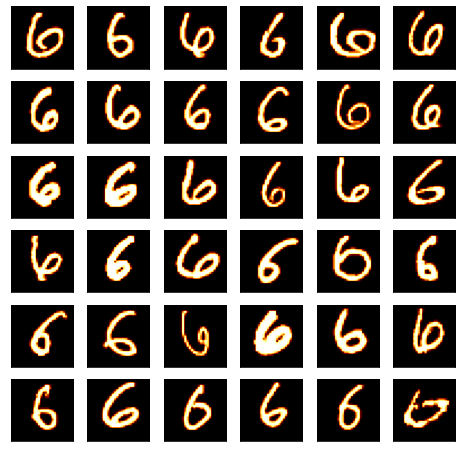

In [8]:
fig, axs = plt.subplots(6, 6)

for i in range(6):
    for j in range(6):
        dataIndex = 6*i+j
        axs[i, j].imshow(np.reshape(sixes[:,dataIndex],(28,28),'F'), cmap=plt.cm.afmhot)
counter = 0
for ax in axs.flatten():
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

    counter += 1
fig.set_figheight(8)
fig.set_figwidth(8)

In [9]:
Wp = pca(sixes, 2)
Zp = Wp @ sixes
print(np.shape(Zp))

(2, 958)


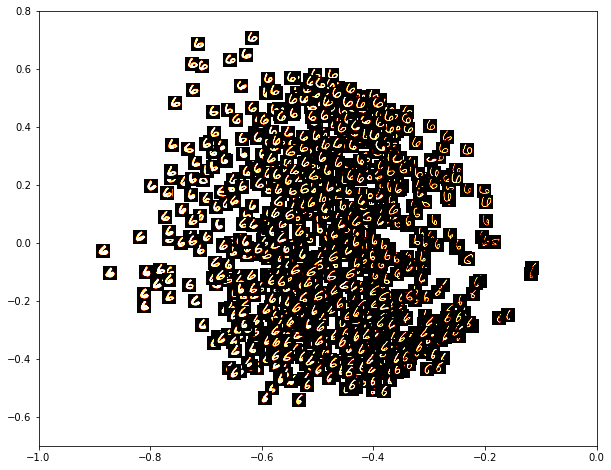

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot()
ax.set_xlim([-1,0])
ax.set_ylim([-.7,.8])
for i in range(958):
    six = sixes[:, i]
    image = np.reshape(six,(28,28),'F')
    coord = Zp[:, i]
    
    ab = AnnotationBbox(OffsetImage(image, zoom=0.5, cmap=plt.cm.afmhot), (coord[0], coord[1]), frameon=False)
    ax.add_artist(ab)

In [11]:
distances = distanceMatrix(sixes.T, numberOfNeighbors=6)
Zim = isomap(distances).T
print(np.shape(Zim))

(2, 958)


Text(0.066, 0.0825, 'Italic')

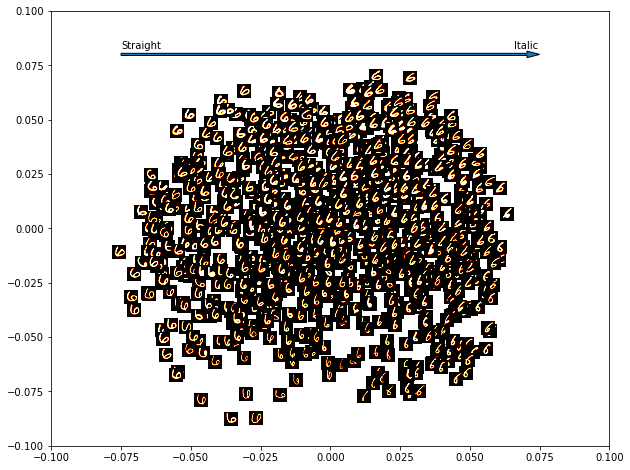

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot()
ax.set_xlim([-0.1,0.1])
ax.set_ylim([-.1,.1])
for i in range(958):
    six = sixes[:, i]
    image = np.reshape(six,(28,28),'F')
    coord = Zim[:, i]

    
    ab = AnnotationBbox(OffsetImage(image, zoom=0.5, cmap=plt.cm.afmhot), (coord[0], coord[1]), frameon=False)
    ax.add_artist(ab)
plt.arrow(-0.075, 0.08, 0.15, 0, length_includes_head=True,)
plt.text(-0.075, 0.0825, "Straight")
plt.text(0.066, 0.0825, "Italic")